<a href="https://colab.research.google.com/github/vikiofficial/Brain_Tumour_Classification/blob/main/BRAIN_TUMOUR_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BRAIN TUMOUR CLASSIFICATION USING CNN**

In [3]:
pip install visualkeras

     |████████████████████████████████| 795 kB 5.1 MB/s 


**LOADING MODULES AND LIBRARIES**

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import visualkeras
from sklearn.model_selection import train_test_split

The categories of the tumors in file:
* 0-glioma tumor
* 1-meningioma tumor
* 2-no tumor
* 3-pituitary tumor




In [5]:
data_dir = (r"/content/drive/MyDrive/braintumor/Training")
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))   

we directed our folder path to variable "data_dir" and including all image files to array called "img_array"

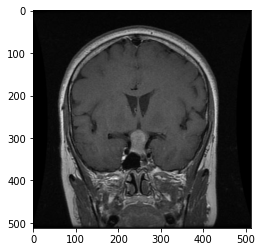

In [6]:
plt.imshow(img_array)

**To find the original size of image**

In [7]:
img_array.shape

(512, 512, 3)

The image has 512 x 512 with 3 channels.

We can reduce the size to 200 for faster model processing 

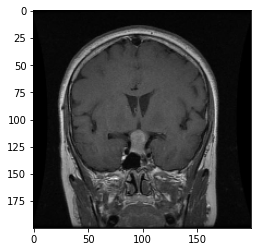

In [8]:
new_size = 200
new_array = cv2.resize(img_array,(new_size,new_size))    
plt.imshow(new_array,cmap = "gray")

In [9]:
x_train=[]
y_train=[]

for i in categories:
    train_path = os.path.join(data_dir,i)
    for j in os.listdir(train_path):
        img = cv2.imread(os.path.join(train_path,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(new_size,new_size))
        x_train.append(img)
        y_train.append(i)

In [10]:
x_train=np.array(x_train)
x_train=x_train/255.0
x_train = x_train.reshape(-1,new_size,new_size,1)
x_train.shape

(2870, 200, 200, 1)

In [11]:
y_train = np.array(y_train)
y_train.shape

(2870,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


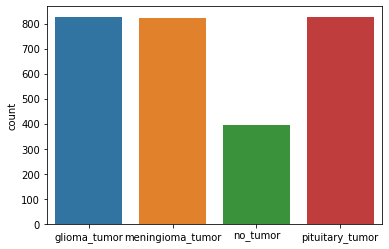

In [12]:
sns.countplot(y_train)

we can split the data into train and test set for processing with algorithms

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
#I have set the validation/test set to 20% from the given dataset

In [14]:
import tensorflow as tf
y_train_new = []
for i in y_train:
    y_train_new.append(categories.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_val_new = []
for i in y_val:
    y_val_new.append(categories.index(i))
y_val = y_val_new
y_val = tf.keras.utils.to_categorical(y_val)

In [15]:
#size of the training dataset
X_train.shape, y_train.shape

((2296, 200, 200, 1), (2296, 4))

In [16]:
#size of the testing dataset
X_val.shape, y_val.shape

((574, 200, 200, 1), (574, 4))

Neural Networks Implementation

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adadelta
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [18]:
epochs = 40
batch_size = 32

In [19]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range = 0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False)  

In [28]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding= 'Same', activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024, activation = "relu"))

model.add(Dense(512, activation = "relu"))

model.add(Dense(4, activation = "softmax"))

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [29]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/40
72/72 [==============================] - 14s 187ms/step - loss: 1.3541 - accuracy: 0.2983 - val_loss: 1.3006 - val_accuracy: 0.4286
Epoch 2/40
72/72 [==============================] - 13s 181ms/step - loss: 1.0514 - accuracy: 0.5444 - val_loss: 1.0169 - val_accuracy: 0.5714
Epoch 3/40
72/72 [==============================] - 13s 180ms/step - loss: 0.8297 - accuracy: 0.6333 - val_loss: 0.9365 - val_accuracy: 0.5836
Epoch 4/40
72/72 [==============================] - 13s 181ms/step - loss: 0.7256 - accuracy: 0.6751 - val_loss: 0.6722 - val_accuracy: 0.7021
Epoch 5/40
72/72 [==============================] - 13s 180ms/step - loss: 0.5862 - accuracy: 0.7448 - val_loss: 0.6044 - val_accuracy: 0.7369
Epoch 6/40
72/72 [==============================] - 13s 181ms/step - loss: 0.5772 - accuracy: 0.7391 - val_loss: 0.6033 - val_accuracy: 0.7456
Epoch 7/40
72/72 [==============================] - 13s 180ms/step - loss: 0.4968 - accuracy: 0.7796 - val_loss: 0.5279 - val_accuracy: 0.7631

In [32]:
model.evaluate(X_val,y_val)

18/18 [==============================] - 1s 63ms/step - loss: 0.5007 - accuracy: 0.9024


[0.5007392168045044, 0.9024389982223511]

Text(0.5, 1.0, 'Accuracy model')

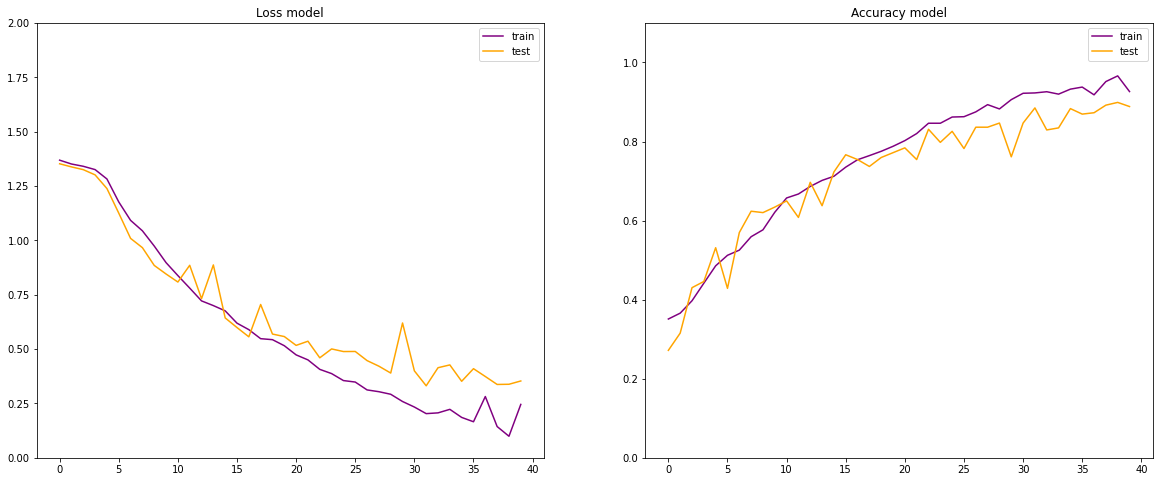

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].plot(history.history["loss"],c = "purple")
axs[0].plot(history.history["val_loss"],c = "orange")
axs[0].set_ylim([0,2])
axs[0].legend(["train", "test"])
axs[0].set_title('Loss model')

axs[1].plot(history.history["accuracy"],c = "purple")
axs[1].plot(history.history["val_accuracy"],c = "orange")
axs[1].set_ylim([0,1.1])
axs[1].legend(["train", "test"])
axs[1].set_title('Accuracy model')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

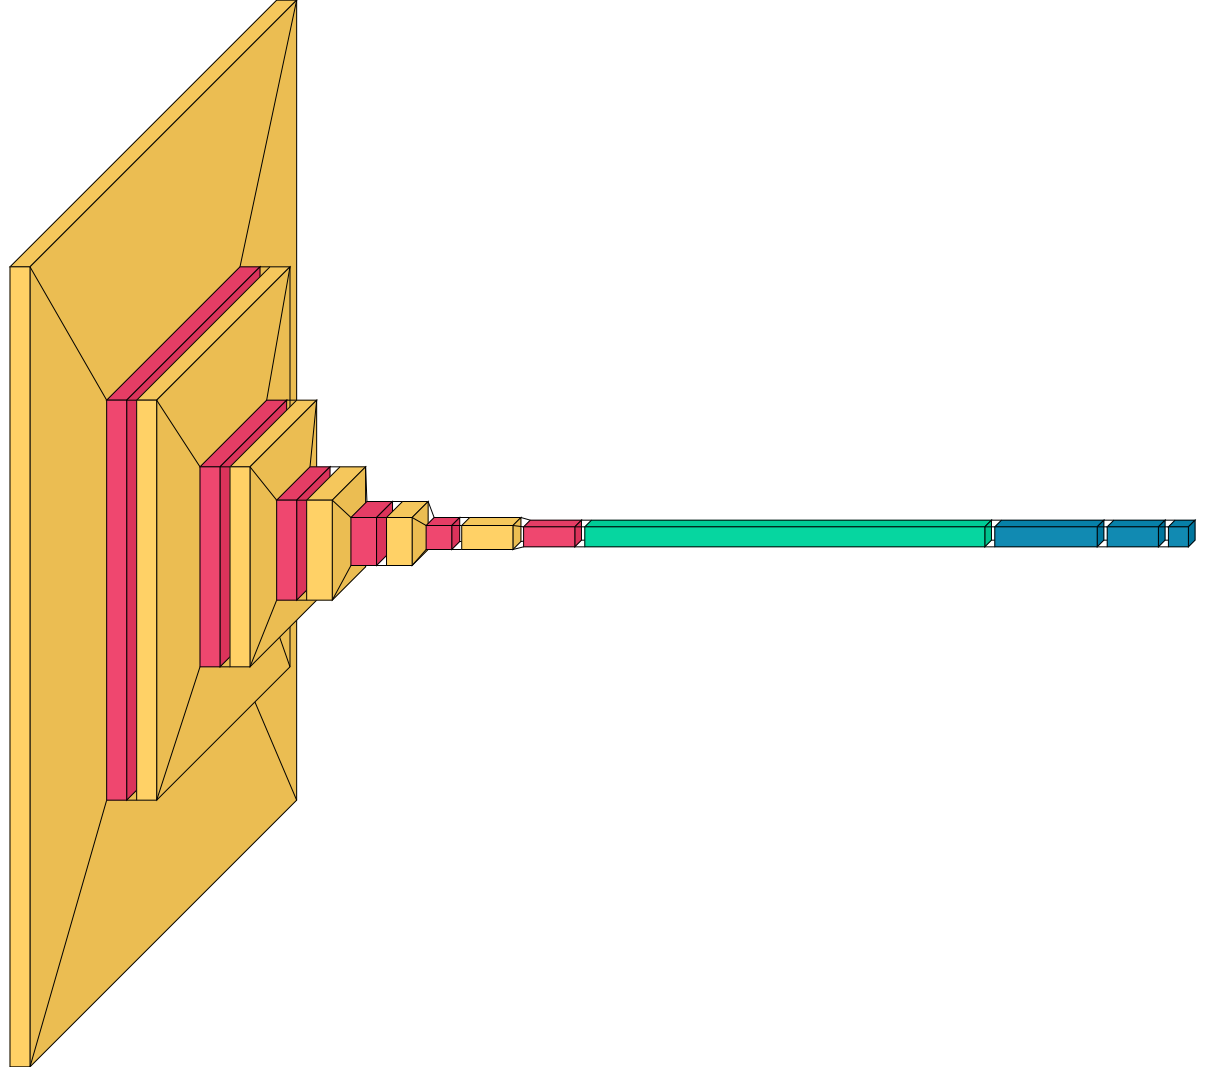

In [24]:
visualkeras.layered_view(model)

In [25]:
y_pred = model.predict(X_val)
class_pred = [np.argmax(i) for i in y_pred]
val_labels =[np.argmax(i) for i in y_val]

In [26]:
from sklearn.metrics import classification_report
report = classification_report(val_labels, class_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       179
           1       0.81      0.91      0.85       169
           2       0.84      0.91      0.88        70
           3       0.96      0.94      0.95       156

    accuracy                           0.89       574
   macro avg       0.89      0.89      0.89       574
weighted avg       0.89      0.89      0.89       574



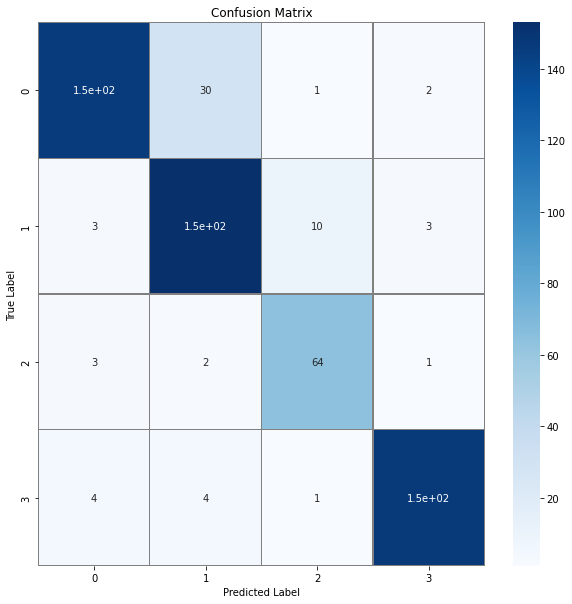

In [27]:
from sklearn.metrics import confusion_matrix

f,ax = plt.subplots(figsize=(10, 10))
confusion_mtx = confusion_matrix(val_labels, class_pred)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()